In [1]:
import numpy as np
import os.path
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import ActivationFunction, step_func, sig_func, tanh_func, relu_func
import matplotlib.pyplot as plt

### **Questão 01**

O primeiro passo é a criação do conjunto de dados, que será usado para treinamento, validação e teste. Neste primeiro caso, resolvemos criar uma base de dados, gerada aleatoriamente, com 1000 instâncias.

In [23]:
data_set_1 = initialize_data("data_set_1", 1000, 17)

Podemos traçar um gráfico a partir dos dados gerados, para verificar se estão de acordo com o desejado:

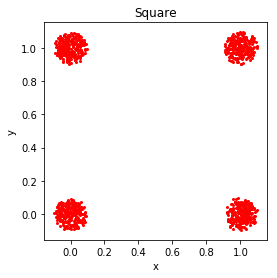

In [24]:
#Plot data
aux_1 = [ inst.input for inst in data_set_1.data() ]
plot_points(aux_1, "Square", "x", "y")

Criamos, então, uma rede neural com as características desejadas, escolhendo o número de entradas (de acordo com os dados gerados), número de neurônios em cada uma das camadas e a função de ativação para cada uma delas. Neste caso, escolhemos 3 entradas e criamos uma rede com uma única camada, contendo 8 neurônios e usando a função Degrau.

Depois de criada a rede, iniciamos o treinamento, fornecendo os dados gerados anteriormente, dizendo o tipo de treinamento (estocástico, neste caso), o número de épocas desejado (10), a taxa de aprendizagem (0.1), o tipo do problema (classificação) e uma lista indicando a razão desejada entre os conjuntos de treinamento, validação e teste (razão 7:2:1, neste caso).

In [6]:
net_1 = NeuralNetwork(3, [8], [step_func])
data_1 = net_1.trainDataSet(data_set_1, "stochastic", 10, learning_rate = 0.1, type = "class", tvt_ratio = [7, 2, 1], 
                            print_info = False)

|| Epoch: 10 || 
|   0   0   0   0   0   0   0   0  |
|   0   0   0   0   0   0   0   0  |
|   0   0   0   0   0   0   0   0  |
|   0   0   0   0   0   0   0   0  |
|   0   0   0   0   0   0   0   0  |
|   0   0   0   0   0  10   0   0  |
|   0   0   0   0   0   0   0   0  |
|   0   0   0   0   0   0   0   0  |

Correct: 100.0%
Incorrect: 0.0%


Após o treinameno, podemos então traçar um gráfico que relaciona a evolução do erro com o número de épocas de treinamento. Vejamos abaixo:

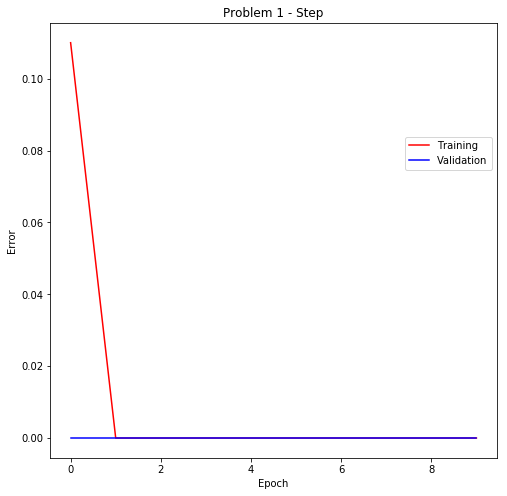

In [5]:
plot_graph(data_1, "Problem 1 - Step", "Epoch", "Error")

### **Questão 01 - Solução alternativa**

Alternativamente, para a mesma questão podemos ter outras soluções. A solução abaixo utiliza uma rede com duas camadas, sendo uma de entrada e outra de saída (nenhuma camada oculta). Ela também usa uma função de ativação diferente (sigmoid) e utiliza mais épocas para treinar (50), mantendo as outras características da primeira rede.

In [34]:
net_1b = NeuralNetwork(3, [3, 8], [sig_func, sig_func], 6)
data_1b = net_1b.trainDataSet(data_set_1, "stochastic", 50, learning_rate = 0.1, type = "class", tvt_ratio = [7, 2, 1], 
                              print_info = False)

|| Epoch: 50 || 
|  16   0   0   0   0   0   0   0  |
|   0  16   0   0   0   0   0   0  |
|   0   0  18   0   0   0   0   0  |
|   0   0   0   9   0   0   0   0  |
|   0   0   0   0  12   0   0   0  |
|   0   0   0   0   0  11   0   0  |
|   0   0   0   0   0   0  12   0  |
|   0   0   0   0   0   0   0   6  |

Correct: 100.0%
Incorrect: 0.0%


Abaixo podemos ver novamente o gráfico que relaciona evolução do erro e número de épocas do treinamento.

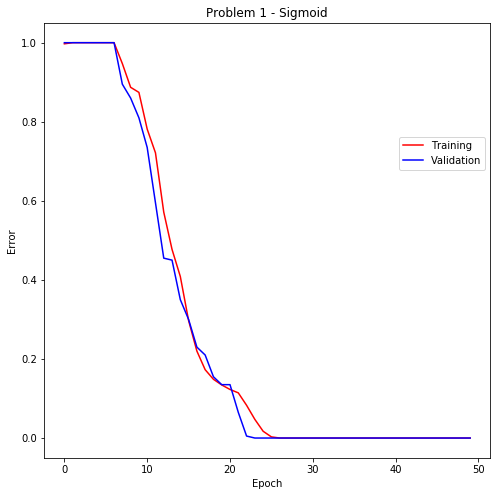

In [35]:
plot_graph(data_1b, "Problem 1 - Sigmoid", "Epoch", "Error")

### **Questão 03 - a**

Nesta questão e nas subsequentes, repetiremos os mesmos passos da primeira questão. Começamos inicializando e visualizando os dados, que referem-se ao funcionamento de uma porta lógica **xor**, com a entrada sendo um par (cada elemento sendo 0 ou 1) e cada saída sendo um valor 0 ou 1. Após a geração, seguimos para o treinamento da rede.

In [6]:
data_set_3a = initialize_data("data_set_3a", 100)

In [ ]:
#Plot data
aux_3a = [ inst.input for inst in data_set_3a.data() ]
plot_points(aux_3a, "XOR", "A", "B")

Para esta rede da terceira questão, decidimos usar 3 camadas (uma de entrada, uma de saída, uma oculta), cada uma utilizando a função de ativação sigmoid. Usamos duas entradas, já que nossos dados de entrada são pares de números (0 ou 1), e uma saída, representando a saída da nossa porta **xor**. Neste caso, usamos um treinamento estocástico e escolhemos o tipo regressão para a rede.

In [10]:
# Stochastic
net_3a1 = NeuralNetwork(2, [2, 4, 1], [sig_func, sig_func, sig_func, sig_func, sig_func])
data_3a1 = net_3a1.trainDataSet(data_set_3a, "stochastic", 50, learning_rate = 0.01, type = "reg", tvt_ratio = [7, 2, 1], 
                                print_info = False)

|| Epoch: 50 || 

Plotamos o resultado da rede, relacionando o Erro Médio Quadrático (MSE - *Mean Squared Error*) a cada época passada:

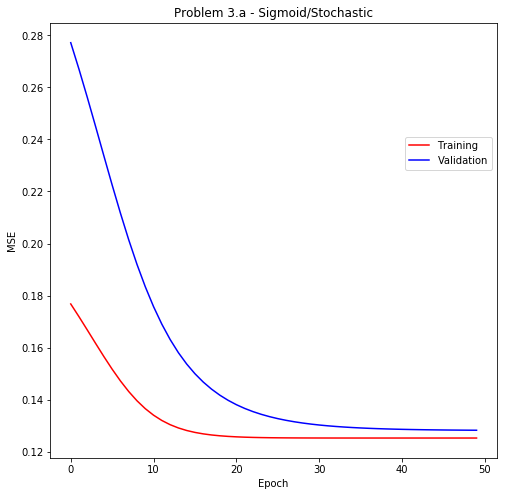

In [11]:
plot_graph(data_3a1, "Problem 3.a - Sigmoid/Stochastic", "Epoch", "MSE")

Nesta próxima rede, trocamos o modo de aprendizado de *estocástico* para *em lotes*. Ajustamos o número de neurônios em cada camada, bem como a quantidade de camadas (2) e a quantidade de épocas (500). Mantivemos, porém, o mesmo conjunto de dados da rede anterior, a fim de comparar o funcionamento de ambas. Depois do treinamento, é possível verificar a evolução do MSE com o passar das épocas.

In [8]:
# Batch
net_3a2 = NeuralNetwork(2, [4, 6, 1], 4*[tanh_func])
data_3a2 = net_3a2.trainDataSet(data_set_3a, "batch", 5000, learning_rate = 0.001, type = "reg", tvt_ratio = [7, 2, 1],
                       print_info = False)

NameError: name 'data_set_3a' is not defined

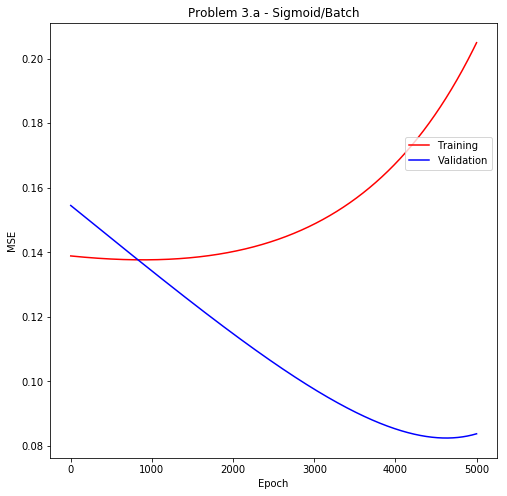

In [23]:
plot_graph(data_3a2, "Problem 3.a - Sigmoid/Batch", "Epoch", "MSE")

Por fim, criamos uma terceira rede para resolver a questão, desta vez com treinamento estocástico, mas fazendo uso do *momento*. Assim, usamos os mesmos parâmetros da primeira rede, porém, usando um *momento* com valor 0.25 (não usá-lo equivale ao valor 0). Logo após, podemos ver o gráfico deste treinamento.

In [14]:
# Stochastic + Momentum
net_3a3 = NeuralNetwork(2, [2, 4, 1], [sig_func, sig_func, sig_func, sig_func, sig_func])
data_3a3 = net_3a3.trainDataSet(data_set_3a, "stochastic", 50, learning_rate = 0.02, type = "reg", tvt_ratio = [7, 2, 1],
                        momentum = 0.5, print_info = False)

|| Epoch: 50 || 

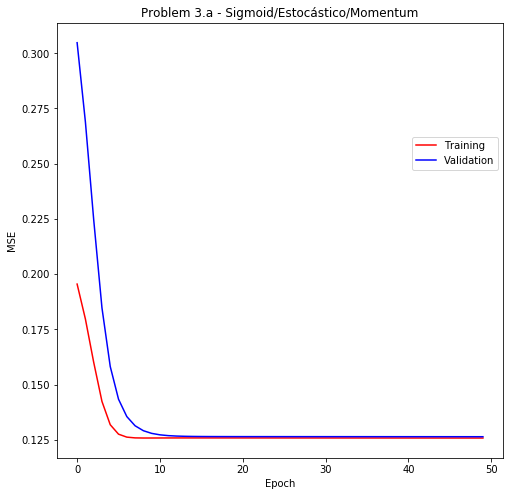

In [16]:
plot_graph(data_3a3, "Problem 3.a - Sigmoid/Estocástico/Momentum", "Epoch", "MSE")

### **Questão 03 - b**

Nesta próxima questão, o objetivo é aproximar uma função real dada. Geramos os dados, que nada mais são que (1000) pares de entradas e saídas desta função (entrada e saída são formadas por um único número real) e assim como nos casos anteriores, podemos visualizar os dados gerados.

In [15]:
data_set_3b = initialize_data("data_set_3b", 100)

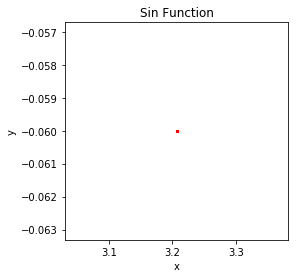

In [16]:
#Plot data
aux_3b = [[inst.input, inst.expected_output] for inst in data_set_3b.data()]
plot_points(aux_3b, "Sin Function", "x", "y")

Como no caso anterior (3-a), criamos então 3 redes distintas. A primeira delas utiliza treinamento **estocástico**, a segunda, **por lote** e a terceira, também estocástico, mas utilizando o **termo do momento**. Cada uma foi configurada com os valores considerados mais adequados para cada parâmetro, variando o número de épocas, número de camadas e a quantidade de neurônios por camada. O conjunto de dados gerado acima foi usado nos três casos.

Primeiro, treinamento estocástico:

In [11]:
# Stochastic
net_3b1 = NeuralNetwork(1, [1, 3, 5, 3, 1], [tanh_func, tanh_func, tanh_func, tanh_func, tanh_func])
data_3b1 = net_3b1.trainDataSet(data_set_3b, "stochastic", 200, learning_rate = 0.1, type = "reg", tvt_ratio = [7, 2, 1], 
                        print_info = False)

|| Epoch: 200 || 

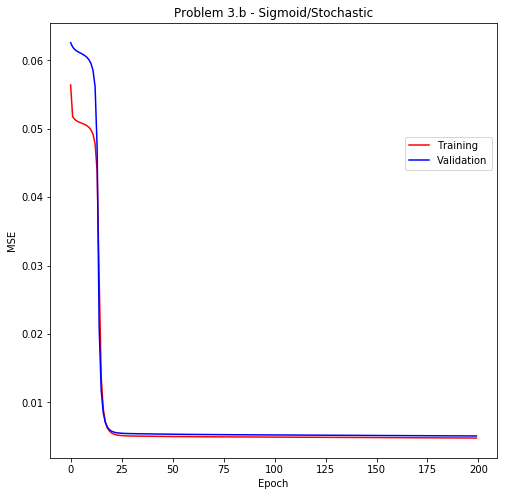

In [12]:
plot_graph(data_3b1, "Problem 3.b - Sigmoid/Stochastic", "Epoch", "MSE")

Depois, treinamento por lote:

In [26]:
# Batch
net_3b2 = NeuralNetwork(1, [6, 4, 6, 1], [tanh_func, tanh_func, tanh_func, tanh_func, tanh_func])
data_3b2 = net_3b2.trainDataSet(data_set_3b, "batch", 200, learning_rate = 0.5, type = "reg", tvt_ratio = [7, 2, 1], 
                        print_info = False)

|| Epoch: 200 || 

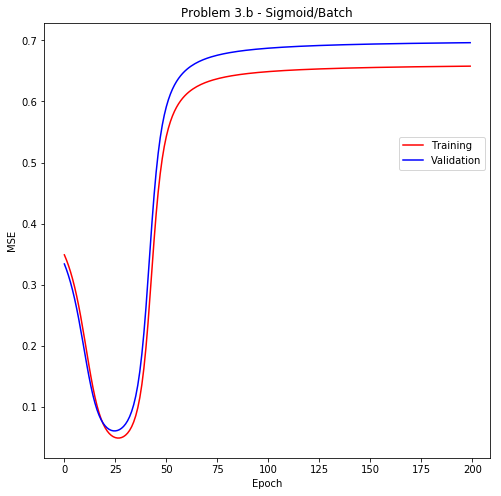

In [27]:
plot_graph(data_3b2, "Problem 3.b - Sigmoid/Batch", "Epoch", "MSE")

Por fim, treinamento estocástico utlizando o termo do momento:

In [22]:
# Stochastic + Momentum
net_3b3 = NeuralNetwork(1, [1, 3, 5, 3, 1], [tanh_func, tanh_func, tanh_func, tanh_func, tanh_func])
data_3b3 = net_3b3.trainDataSet(data_set_3b, "stochastic", 200, learning_rate = 0.5, type = "reg", tvt_ratio = [7, 2, 1], 
                        momentum = 0.5, print_info = False)

|| Epoch: 200 || 

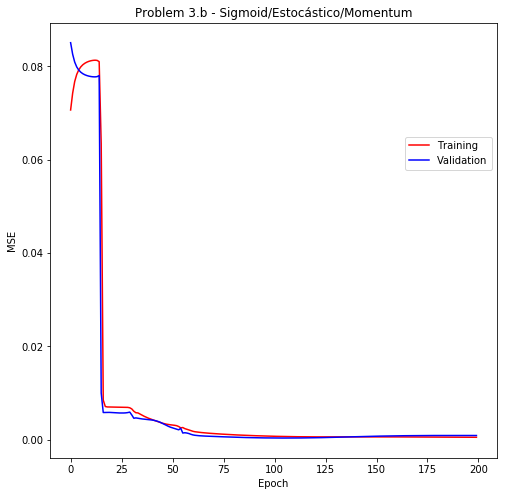

In [23]:
plot_graph(data_3b3, "Problem 3.b - Sigmoid/Estocástico/Momentum", "Epoch", "MSE")

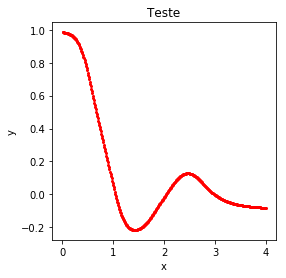

In [25]:
#Grafico
aux_ex = []
for instance in range(1, 400):
    net_3b3.classify([instance/100])
    aux_ex.append([instance/100, net_3b3.output[0]])


plot_points(aux_ex, "Teste", "x", "y")

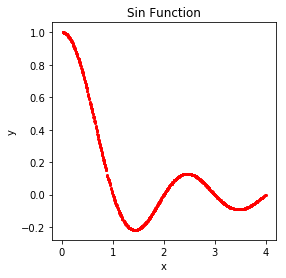

In [36]:
#Plot data
aux_3b = [[inst.input, inst.expected_output] for inst in data_set_3b.data()]
plot_points(aux_3b, "Sin Function", "x", "y")

### **Questão 04**

Aqui temos um conjunto de pontos distribuídos no interior de uma circunferência de raio 1, entrada na origem dos eixos cartesianos. Devemos então classificar, através de nossa rede, os pontos fornecidos, dizendo a qual grupo, dentre 8 definidos, eles pertencem. O conjunto de treinamento consiste, então, de entradas formadas por 2 elementos (coordenadas x e y do ponto) e uma saída composta por 8 valores, cada um representando uma das saídas quando ativado (maior que 0.5).

In [5]:
data_set_4 = initialize_data("data_set_4", 2000)

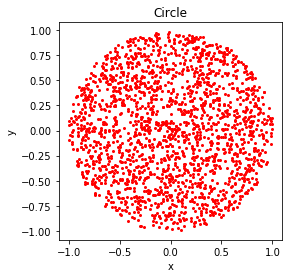

In [6]:
#Plot data
aux_4 = [inst.input for inst in data_set_4.data()]
plot_points( aux_4, "Circle", "x", "y")

Para resolver nosso problema, criamos a rede neural abaixo, que possui 4 camadas, sendo 2 ocultas, formada 22 neurônios no total e usando a função de ativação sigmoid. No treinamento, usamos 500 épocas, uma taxa de aprendizagem de 0.15 e um momentum de 0.5. O problema, como já (implicitamente) mencionado, é de classificação.

In [8]:
net_4 = NeuralNetwork(2, [2, 6, 6, 8], [sig_func, sig_func, sig_func, sig_func])
data_4 = net_4.trainDataSet(data_set_4, "stochastic", 500, learning_rate = 0.02, type = "class", tvt_ratio = [7, 2, 1],
                        momentum = 0.75)

|| Epoch: 500 || 
|  16   1   1   5   0   1   0   0  |
|   1  33   1   0   1   1   0   0  |
|   0   0  32   2   0   0   9   0  |
|   0   0   0  27   0   0   0   2  |
|   1   1   0   0  19   0   0   0  |
|   0   3   0   0   0  12   0   0  |
|   0   0   6   1   0   0   4   0  |
|   0   0   0   6   0   0   0  14  |

Correct: 78.5%
Incorrect: 21.5%


Abaixo podemos gerar e visualizar um gráfico que representa a evolução do erro com o passar das épocas do treinamento. Observe que o erro estabilizou em um valor razoavelmente alto, apesar do número de épocas relativamente alto usado em relação aos outros problemas.

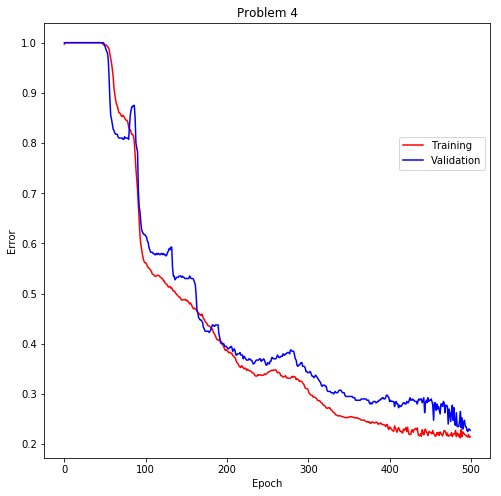

In [9]:
plot_graph(data_4, "Problem 4", "Epoch", "Error")

### **Questão 05**

Neste último problema, precisamos prevê os próximos 3 valores de uma sequência com base nos 10 anteriores. Logo, nos nossos dados de treinamento, a entrada é um vetor com 10 elementos e a saída correspondente é um vetor de 3 elementos. Usamos 100 objetos para o treinamento. Como os dados são muito complexos, não é possível visualizá-los, como nos casos anteriores.

In [29]:
data_set_5 = initialize_data("data_set_5", 2000)

Desta vez, criamos uma rede com 5 camadas (3 ocultas), usando a função de ativação sigmoid. Setamos os demais valores, treinando por 100 épocas. O resultado pode ser plotado e visto logo após a execução da rede.

In [30]:
net_5 = NeuralNetwork(10, [10, 8, 4, 1], 4*[tanh_func])
data_5 = net_5.trainDataSet(data_set_5, "stochastic", 500, learning_rate = 0.0005, type = "reg", tvt_ratio = [7, 2, 1],
                       momentum = 0.2, print_info = False)

|| Epoch: 500 || 

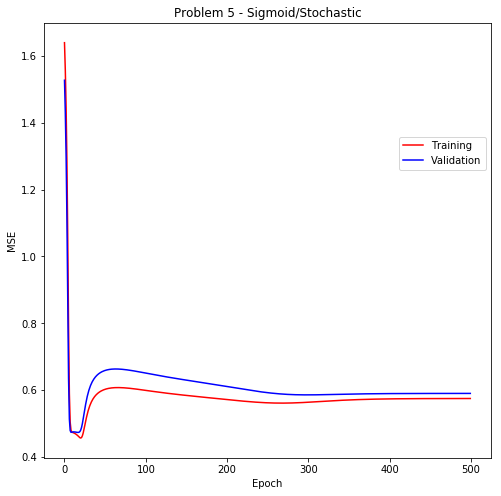

In [33]:
plot_graph(data_5, "Problem 5 - Sigmoid/Stochastic", "Epoch", "MSE")